In [4]:
from pymavlink import mavutil

import matplotlib.pyplot as plt
import pandas as pd
import os
import geopandas as gpd
from shapely.geometry import Point, LineString

In [5]:
path_log = 'G:/Ingenio Azucarero Guabira S.A/UTEA - SEMANAL - EQUIPO AVIACION UTEA/Trichogramma/2024/TLOGS/ALTA_01'
path_res = 'G:/Ingenio Azucarero Guabira S.A/UTEA - SEMANAL - EQUIPO AVIACION UTEA/Trichogramma/2024/TLOGS/ALTA_01'

In [6]:
contenido = os.listdir(path_log)
len(contenido)

29

In [7]:
contenido

['2024-07-01 13-11-17.tlog',
 '2024-07-01 17-37-19.tlog',
 '2024-07-01 17-38-37.tlog',
 '2024-07-01 18-22-17.tlog',
 '2024-07-01 19-52-18.tlog',
 '2024-07-01 20-35-38.tlog',
 '2024-07-01 21-49-26.tlog',
 '2024-07-01 22-24-53.tlog',
 '2024-07-01 23-07-04.tlog',
 '2024-07-01 23-43-15.tlog',
 '2024-07-02 00-27-21.tlog',
 '2024-07-02 02-43-47.tlog',
 '2024-07-02 03-20-34.tlog',
 '2024-07-02 03-33-48.tlog',
 '2024-07-02 03-55-53.tlog',
 '2024-07-02 04-23-29.tlog',
 '2024-07-02 05-02-45.tlog',
 '2024-07-02 08-33-41.tlog',
 '2024-07-02 15-49-35.tlog',
 '2024-07-02 22-23-42.tlog',
 '2024-07-03 03-59-59.tlog',
 '2024-07-03 05-19-08.tlog',
 '2024-07-03 19-22-35.tlog',
 '2024-07-03 21-10-56.tlog',
 '2024-07-03 23-28-42.tlog',
 '2024-07-03 23-59-40.tlog',
 '2024-07-04 02-55-29.tlog',
 '2024-07-04 02-59-36.tlog',
 '2024-07-04 13-57-18.tlog']

In [8]:
def leer_logs(lista_logs):
    list_geo = []
    list_name = []
    for i in lista_logs:
        log = path_log + '/' + i
        mlog = mavutil.mavlink_connection(log)
        lats = []
        lons = []
        while True:
            msg = mlog.recv_match()
            if not msg:
                break
            # Ejemplo de procesamiento de mensaje
            if msg.get_type() == 'GLOBAL_POSITION_INT':
                lat = msg.lat / 1e7  # Latitud en grados
                lon = msg.lon / 1e7  # Longitud en grados
                lats.append(lat)
                lons.append(lon)

        coors = {'lat':lats, 'lon':lons}
        df = pd.DataFrame(coors)
        
        geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
        line = LineString(geometry)
        list_geo.append(line)
        list_name.append(i)
    #dict_lines = {'geos':list_geo, 'names':list_name}
    #gdf_line = gpd.GeoDataFrame(dict_lines, crs="EPSG:4326")
    #gdf_line_utm = gdf_line.to_crs(epsg=32720)
    return (list_geo, list_name)

In [9]:
lineas, names = leer_logs(contenido)

In [10]:
len(lineas)

29

In [11]:
len(names)

29

In [12]:
# Crear un GeoDataFrame con los LineStrings y sus nombres
gdf_lines = gpd.GeoDataFrame({'name': names, 'geometry': lineas}, crs="EPSG:4326")

In [13]:
gdf_lines

,name,geometry
0,2024-07-01 13-11-17.tlog,"LINESTRING (-63.19876 -17.24399, -63.19876 -17..."
1,2024-07-01 17-37-19.tlog,"LINESTRING (-62.97410 -17.22839, -62.97410 -17..."
2,2024-07-01 17-38-37.tlog,"LINESTRING (-62.97416 -17.22837, -62.97416 -17..."
3,2024-07-01 18-22-17.tlog,"LINESTRING (-62.97417 -17.22835, -62.97417 -17..."
4,2024-07-01 19-52-18.tlog,"LINESTRING (-62.98185 -17.22397, -62.98185 -17..."
5,2024-07-01 20-35-38.tlog,"LINESTRING (-62.98178 -17.22402, -62.98178 -17..."
6,2024-07-01 21-49-26.tlog,"LINESTRING (-62.98743 -17.22733, -62.98743 -17..."
7,2024-07-01 22-24-53.tlog,"LINESTRING (-62.99866 -17.21325, -62.99866 -17..."
8,2024-07-01 23-07-04.tlog,"LINESTRING (-62.99750 -17.21572, -62.99750 -17..."
9,2024-07-01 23-43-15.tlog,"LINESTRING (-62.99751 -17.21573, -62.99751 -17..."


In [14]:
# Función para dividir y limpiar las líneas
def dividir_y_limpiar_linea(linea):
    puntos = list(linea.coords)
    nuevas_lineas = []
    nueva_linea = []
    
    for punto in puntos:
        if punto != (0, 0):
            nueva_linea.append(punto)
        else:
            if nueva_linea:
                nuevas_lineas.append(LineString(nueva_linea))
                nueva_linea = []
    
    if nueva_linea:
        nuevas_lineas.append(LineString(nueva_linea))
    
    return nuevas_lineas

In [15]:
# Crear una lista para las nuevas líneas y nombres
nuevas_lineas = []
nuevos_nombres = []
for idx, row in gdf_lines.iterrows():
    lineas_divididas = dividir_y_limpiar_linea(row.geometry)
    for linea in lineas_divididas:
        nuevas_lineas.append(linea)
        nuevos_nombres.append(row['name'])

In [16]:
# Crear un nuevo GeoDataFrame con las nuevas líneas
gdf_lines = gpd.GeoDataFrame({'name': nuevos_nombres, 'geometry': nuevas_lineas}, crs="EPSG:4326")

In [17]:
# Función para contar la cantidad de coordenadas en una geometría de tipo LINESTRING
def contar_coordenadas(linea):
    return len(linea.coords)

In [18]:
gdf_lines['cant_coor'] = gdf_lines['geometry'].apply(contar_coordenadas)

In [19]:
gdf_lines

,name,geometry,cant_coor
0,2024-07-01 13-11-17.tlog,"LINESTRING (-63.19876 -17.24399, -63.19876 -17...",6713
1,2024-07-01 13-11-17.tlog,"LINESTRING (-63.19873 -17.24403, -63.19874 -17...",3090
2,2024-07-01 17-37-19.tlog,"LINESTRING (-62.97410 -17.22839, -62.97410 -17...",264
3,2024-07-01 17-37-19.tlog,"LINESTRING (-62.97410 -17.22839, -62.97410 -17...",4338
4,2024-07-01 17-37-19.tlog,"LINESTRING (-62.97417 -17.22834, -62.97417 -17...",495
...,...,...,...
57,2024-07-04 02-55-29.tlog,"LINESTRING (-62.96278 -17.22923, -62.96278 -17...",3888
58,2024-07-04 02-55-29.tlog,"LINESTRING (-62.96280 -17.22924, -62.96280 -17...",267
59,2024-07-04 02-55-29.tlog,"LINESTRING (-62.96280 -17.22923, -62.96280 -17...",4349
60,2024-07-04 02-59-36.tlog,"LINESTRING (-62.97394 -17.22846, -62.97394 -17...",510


<Axes: >

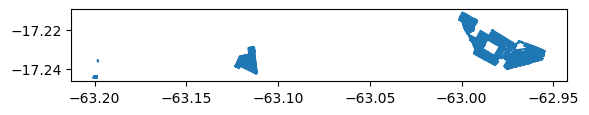

In [20]:
gdf_lines.plot()

In [21]:
gdf_lines_utm = gdf_lines.to_crs(epsg=32720)

In [22]:
output_path = 'output_lines_with_names_shapefile.shp'
gdf_lines_utm.to_file(output_path)